# **Aritmética de píxeles**

Desarrollo de operaciones aritméticas con imágenes como: ***cuasi-suma*** y ***cuasi-resta*** en el espacio 'RGB' y 'YIQ'.

1. Suma y diferencia clampeada en RGB.
2. Suma y diferencia promediada en RGB.
3. Suma y diferencia en YIQ.
4. If-lighter / If-darker

## **1. Lectura de imágenes**

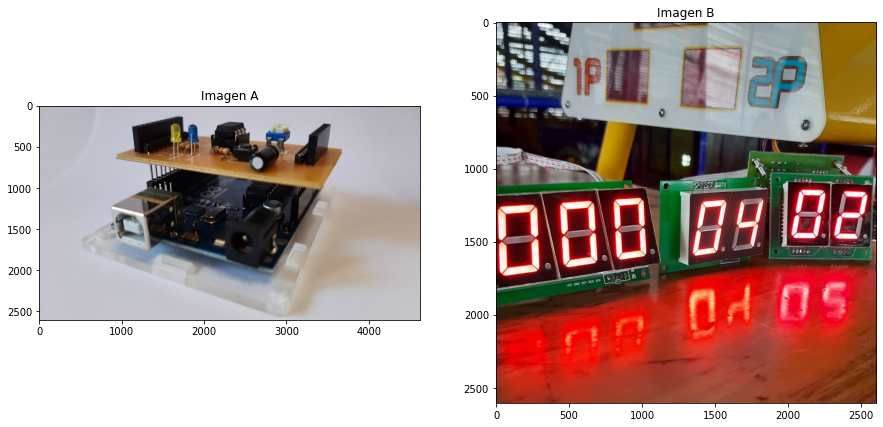

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Ubicación y nombre de la imagen
path = 'docs/'
file_name_A = 'ardu_shield.jpg'
file_name_B = 'counter_pcb.jpg'

im_object_A = Image.open(path + file_name_A)
im_object_B = Image.open(path + file_name_B)

fig, axs = plt.subplots(1, 2, figsize=(15,15))

axs[0].set_title('Imagen A')
axs[0].imshow(im_object_A)

axs[1].set_title('Imagen B')
axs[1].imshow(im_object_B)

plt.show()

* Se convierten las imágenes previas a matrices y se recortan de manera que ambas presenten el mismo alto y ancho

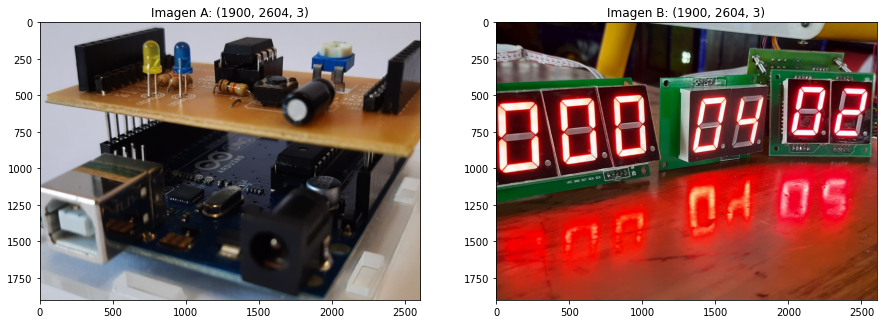

In [2]:
im_A = np.array(im_object_A).astype('uint8')[100:2000, 896:3500, :]/255
im_B = np.array(im_object_B).astype('uint8')[703::, :, :]/255

fig, axs = plt.subplots(1, 2, figsize=(15,15))

axs[0].set_title('Imagen A: ' + str(im_A.shape))
axs[0].imshow(im_A)

axs[1].set_title('Imagen B: ' + str(im_B.shape))
axs[1].imshow(im_B)

plt.show()

* Antes de iniciar las operaciones con las imágenes, se declaran tres funciones que se requerirán para el desarrollo de las mismas.

In [3]:
# +--------------------------------------------------------------------+
# |                       PRODUCTO ENTRE MATRICES                      |
# +--------------------------------------------------------------------+
def apply_matrix(image, matrix):
    """
    Entradas:
        image  -> Array de 3-dimensiones de una imagen RGB 
                  con la forma: (alto, ancho, canales).
                  
        matrix -> Matriz de 3x3 con los valores a operar en 
                  la imagen.
    
    Salida:
        Producto matricial de 'image' y 'matrix' con la forma 
        de 'image'.
    """
    return np.matmul(image.reshape((-1,3)), matrix.T).reshape(image.shape)

# +--------------------------------------------------------------------+
# |                         CONVERSIÓN RGB -> YIQ                      |
# +--------------------------------------------------------------------+
def rgb2yiq(image):
    """
    Entrada: 
        image -> Array de 3-dimensiones de una imagen RGB 
                 con la forma: (alto, ancho, canales).
                 
                 image[..., 0] -> canal R
                 image[..., 1] -> canal G
                 image[..., 2] -> canal B
    
    Salida:
        yiq_image -> Array de 3-dimensiones de la imagen 
                     'image' en el espacio YIQ. 
        
                     yiq_image[..., 0] -> canal Y
                     yiq_image[..., 1] -> canal I
                     yiq_image[..., 2] -> canal Q
    """
    
    rgb2yiq_matrix = np.array([[0.299,       0.587,       0.114],
                               [0.59590059, -0.27455667, -0.32134392],
                               [0.21153661, -0.52273617,  0.31119955]])
    
    if image.max() > 1:
        image = image/255.0
        print("-> Reescalando la imagen en un rango de [0, 1]")
    
    yiq_image = apply_matrix(image, rgb2yiq_matrix)
    
    return yiq_image

# +--------------------------------------------------------------------+
# |                         CONVERSIÓN YIQ -> RGB                      |
# +--------------------------------------------------------------------+
def yiq2rgb(image):
    """
    Entrada: 
        image -> Array de 3-dimensiones de una imagen en el 
                 espacio YIQ con la forma: (alto, ancho, canales).
                 
                 image[..., 0] -> canal Y
                 image[..., 1] -> canal I
                 image[..., 2] -> canal Q
    
    Salida:
        rgb_image -> Array de 3-dimensiones de la imagen 
                     'image' en el espacio RGB. 
        
                     rgb_image[..., 0] -> canal R
                     rgb_image[..., 1] -> canal G
                     rgb_image[..., 2] -> canal B
    """
    
    yiq2rgb_matrix = np.array([[1,  0.9663,  0.6210],
                               [1, -0.2721, -0.6474],
                               [1, -1.1070,  1.7046]])
    
    rgb_image = np.clip(apply_matrix(image, yiq2rgb_matrix), 0, 1)
    
    return rgb_image

* Para las siguientes operaciones, se establece que ***A***, ***B*** y ***C*** son imágenes cualesquiera en formato RGB (con mismo alto y ancho).


* Para la visualización, se define una función llamada ***plot_result*** la cual muestra en un subplot la imagen A (*im_A*), B (*im_B*) y el resultado C (*im_C*).


* Adicional, se define una variable de tipo diccionario (*results*) en donde se guardan los resultados de cada operación para posterior comparación.

In [4]:
# Resultados de las operaciones con imágenes
results = {}

# Gráfica de las imágenes operadas (im_A, im_B) y su respectivo resultado (im_C)
def plot_result():
    fig, axs = plt.subplots(1, 3, figsize=(20,20))

    axs[0].set_title('Imagen A')
    axs[0].imshow(im_A)
    axs[0].set_axis_off()

    axs[1].set_title('Imagen B')
    axs[1].imshow(im_B)
    axs[1].set_axis_off()

    axs[2].set_title('Imagen C')
    axs[2].imshow(im_C)
    axs[2].set_axis_off()

    plt.show()

## **2. Operaciones en el espacio RGB**

### **2.1. Suma clampeada**

$$C = A + B$$

 * Sí $C>255 \rightarrow C=255$


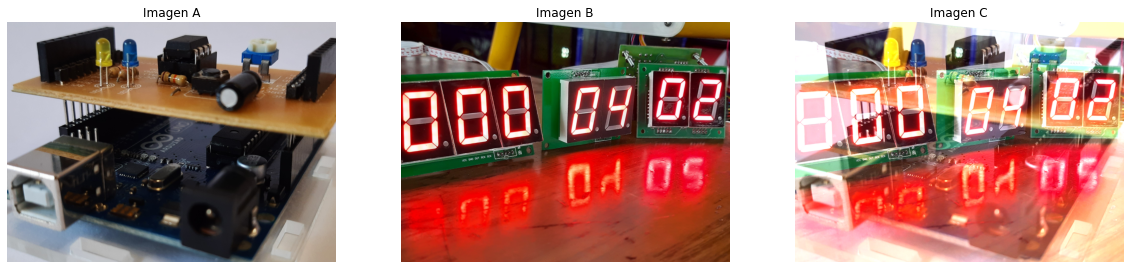

In [5]:
# Se acota entre 0 y 1 ya que las imágenes estan con valores de [0, 1]
im_C = np.clip(im_A + im_B, 0, 1)

results['Suma clampeada RGB'] = im_C

plot_result()

### **2.2. Suma promediada**

$$C=\frac{A+B}{2}$$

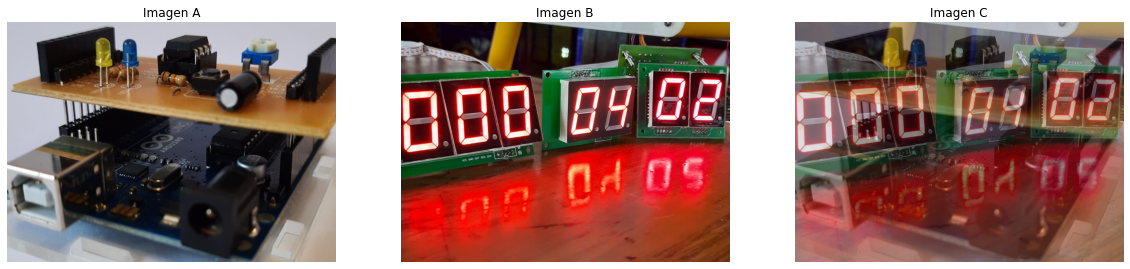

In [6]:
im_C = (im_A + im_B)/2

results['Suma promediada RGB'] = im_C

plot_result()

### **2.3. Resta clampeada**

$$C = A - B$$

* Sí $C<0 \rightarrow C=0$

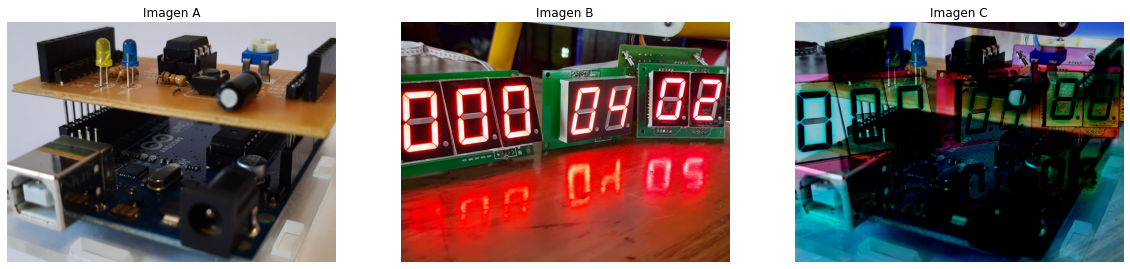

In [7]:
im_C = np.clip(im_A - im_B, 0, 1)

results['Resta clampeada RGB'] = im_C

plot_result()

### **2.4. Resta promediada**

$$C=\frac{A-B}{2}$$

* Para esta operación, el valor más bajo que se puede obtener es de $(0 - 255)/2=-127$ o $-0.5$ si se toma la imagen en un rango de [0, 1].


* Por lo anterior, a la operación mostrada, se le adiciona $127$ para imágenes en el rango de [0, 255] y $0.5$ para valores que oscilan entre [0, 1]

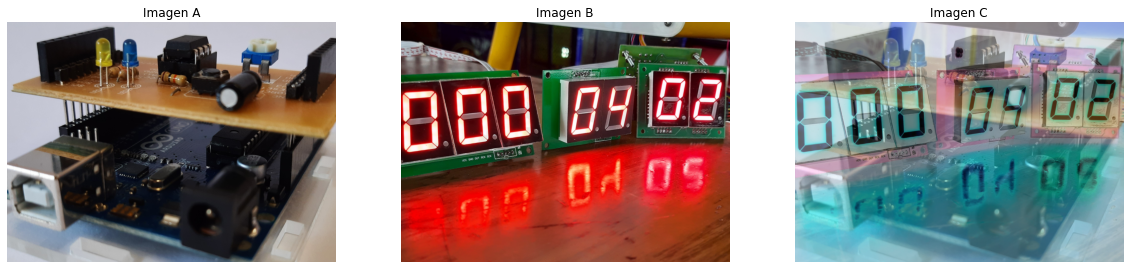

In [8]:
im_C = ((im_A - im_B) / 2) + 0.5

results['Resta promediada RGB'] = im_C

plot_result()

## **3. Operaciones en el espacio YIQ**

* Para las siguientes operaciones, se establece que $Y_x, I_x, Q_x$ son los valores de los canales $Y, I, Q$ respectivamente de una imagen $x$.

In [9]:
def operate_yiq(image1, image2, operation):
    """
    Entradas: 
        image1, image2 -> Array de 3-dimensiones de una imagen en el 
                          espacio RGB con la forma: (alto, ancho, canales).
                 
                 image[..., 0] -> canal R
                 image[..., 1] -> canal G
                 image[..., 2] -> canal B
        
        operation      -> String con el tipo de operación a realizar:
                
                'sum_clamp'  -> suma clampeada
                'sum_avg'    -> suma promediada
                'diff_clamp' -> resta clampeada
                'diff_avg'   -> resta promediada
    
    Salida:
        Imagen en el espacio RGB en el rango de [0, 1] con la operación
        ingresada por parámetro.
    """
    
    # Imagen A y B en el espacio YIQ
    im1_yiq = rgb2yiq(image1)
    im2_yiq = rgb2yiq(image2)

    # Canales de la imagen A y B
    YA = im1_yiq[..., 0]
    IA = im1_yiq[..., 1]
    QA = im1_yiq[..., 2]

    YB = im2_yiq[..., 0]
    IB = im2_yiq[..., 1]
    QB = im2_yiq[..., 2]

    # Resultado de la operación
    image3 = np.zeros(im_A.shape)

    # Operación respectiva para cada canal de la imagen C [Y, I, Q]
    if operation == 'sum_clamp':
        image3[..., 0] = np.clip(YA + YB, 0, 1)
        image3[..., 1] = ((YA * IA) + (YB * IB)) / (YA + YB)
        image3[..., 2] = ((YA * QA) + (YB * QB)) / (YA + YB)
        
    elif operation == 'sum_avg':
        image3[..., 0] = (YA + YB) / 2
        image3[..., 1] = ((YA * IA) + (YB * IB)) / (YA + YB)
        image3[..., 2] = ((YA * QA) + (YB * QB)) / (YA + YB)
    
    elif operation == 'diff_clamp':
        image3[..., 0] = np.clip(YA - YB, 0, 1)
        image3[..., 1] = ((YA * IA) - (YB * IB)) / (YA + YB)
        image3[..., 2] = ((YA * QA) - (YB * QB)) / (YA + YB)
    
    elif operation == 'diff_avg':
        image3[..., 0] = ((YA - YB) / 2) + 0.5
        image3[..., 1] = ((YA * IA) - (YB * IB)) / (YA + YB)
        image3[..., 2] = ((YA * QA) - (YB * QB)) / (YA + YB)
    
    return yiq2rgb(image3)

### **3.1. Suma clampeada**

$$Y_C = Y_A + Y_B$$


$$I_C = \frac{(Y_A*I_A) + (Y_B*I_B)}{Y_A + Y_B}$$


$$Q_C = \frac{(Y_A*Q_A) + (Y_B*Q_B)}{Y_A + Y_B}$$

* Sí $Y_C > 1 \rightarrow Y_C = 1$

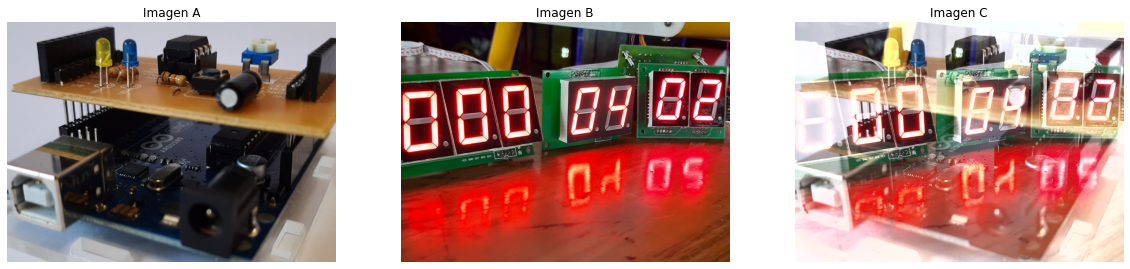

In [10]:
im_C = operate_yiq(im_A, im_B, 'sum_clamp')

results['Suma clampeada YIQ'] = im_C

plot_result()

### **3.2. Suma promediada**

$$Y_C = \frac{Y_A + Y_B}{2}$$

* Las operaciones para los canales $I$ y $Q$ son las mismas a la suma clampeada.

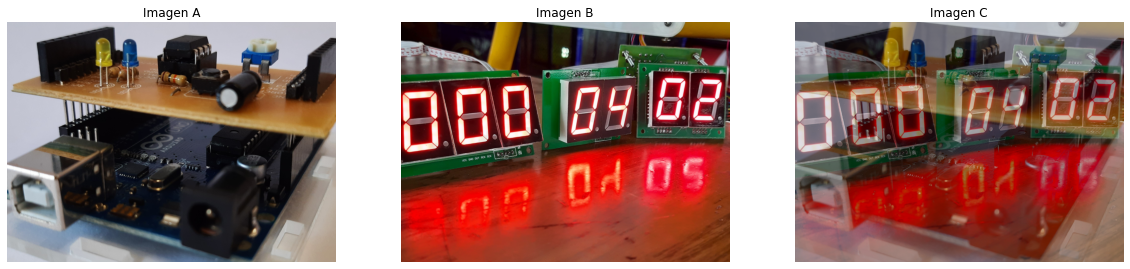

In [11]:
im_C = operate_yiq(im_A, im_B, 'sum_avg')

results['Suma promediada YIQ'] = im_C

plot_result()

### **3.3. Resta clampeada**

$$Y_C = Y_A - Y_B$$


$$I_C = \frac{(Y_A*I_A) - (Y_B*I_B)}{Y_A + Y_B}$$


$$Q_C = \frac{(Y_A*Q_A) - (Y_B*Q_B)}{Y_A + Y_B}$$

* Sí $Y_C < 0 \rightarrow Y_C = 0$

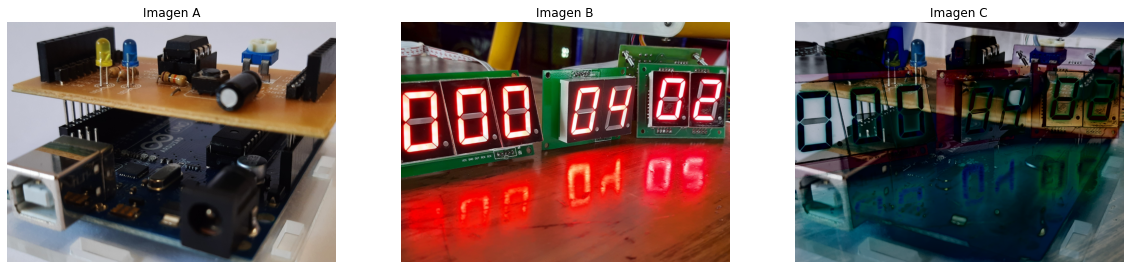

In [12]:
im_C = operate_yiq(im_A, im_B, 'diff_clamp')

results['Resta clampeada YIQ'] = im_C

plot_result()

### **3.4. Resta promediada**

$$Y_C = \frac{Y_A - Y_B}{2}$$

* Las operaciones para los canales $I$ y $Q$ son las mismas a la resta clampeada.


* De la misma forma que en la resta promediada (en el espacio RGB), a la operación en mención se le adicionan $0.5$ para no obtener valores negativos.

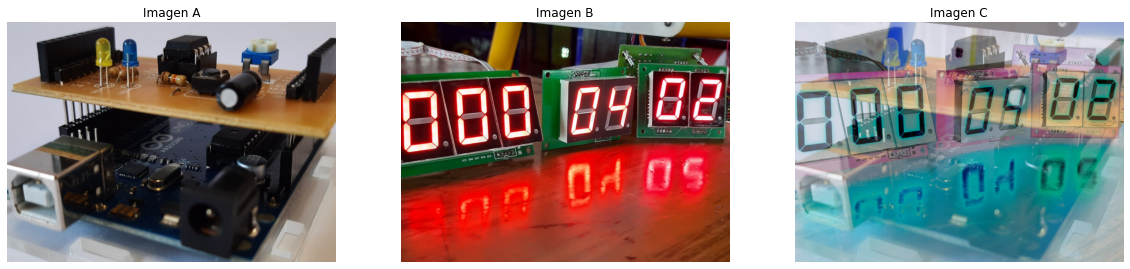

In [13]:
im_C = operate_yiq(im_A, im_B, 'diff_avg')

results['Resta promediada YIQ'] = im_C

plot_result()

### **3.3. If-lighter**
$$(Y_C, I_C, Q_C)=\begin{cases} (Y_A, I_A, Q_A),&\text{Sí $Y_A > Y_B$}\\(Y_B, I_B, Q_B),&\text{Sí $Y_A \leq Y_B$}\end{cases}$$

In [14]:
def lighter(image1, image2):
    
    # Matriz auxiliar
    aux_matrix = np.zeros((image1.shape[0], image1.shape[1]))
    
    # Imágenes en espacio YIQ
    image1_yiq = rgb2yiq(image1)
    image2_yiq = rgb2yiq(image2)
    
    # aux_matrix = 1, sí Y_A > Y_B
    aux_matrix[image1_yiq[..., 0] > image2_yiq[..., 0]] = 1
    
    # imagen resultante
    image3 = np.zeros(image1.shape)
    
    # Se asignan los valores para los canales Y, I, Q.
    for i in range(0, 3):
        image3[..., i] = (image1_yiq[..., i] * aux_matrix) + (image2_yiq[..., i] * (1 - aux_matrix))
    
    return yiq2rgb(image3)

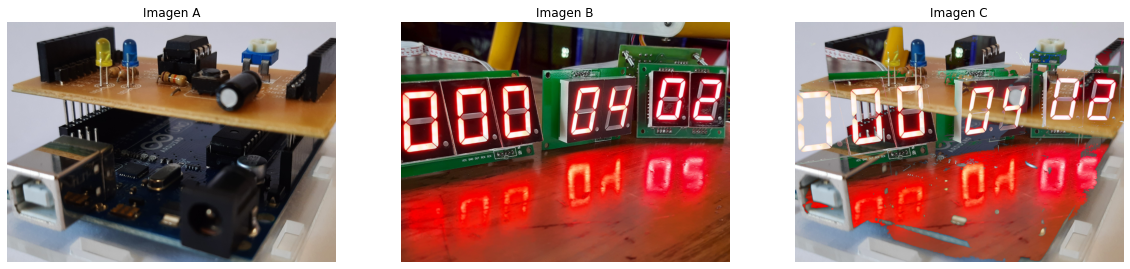

In [15]:
im_C = lighter(im_A, im_B)

results['If-lighter'] = im_C

plot_result()

### **3.3. If-darker**
$$(Y_C, I_C, Q_C)=\begin{cases} (Y_A, I_A, Q_A),&\text{Sí $Y_A < Y_B$}\\(Y_B, I_B, Q_B),&\text{Sí $Y_A \geq Y_B$}\end{cases}$$

In [16]:
def darker(image1, image2):
    
    # Matriz auxiliar    
    aux_matrix = np.zeros((image1.shape[0], image1.shape[1]))
    
    # Imágenes en espacio YIQ
    image1_yiq = rgb2yiq(image1)
    image2_yiq = rgb2yiq(image2)
    
    # aux_matrix = 1, sí Y_A < Y_B
    aux_matrix[image1_yiq[..., 0] < image2_yiq[..., 0]] = 1
    
    # imagen resultante
    image3 = np.zeros(image1.shape)
    
    # Se asignan los valores para los canales Y, I, Q.
    for i in range(0, 3):
        image3[..., i] = (image1_yiq[..., i] * aux_matrix) + (image2_yiq[..., i] * (1 - aux_matrix))
        
    return yiq2rgb(image3)

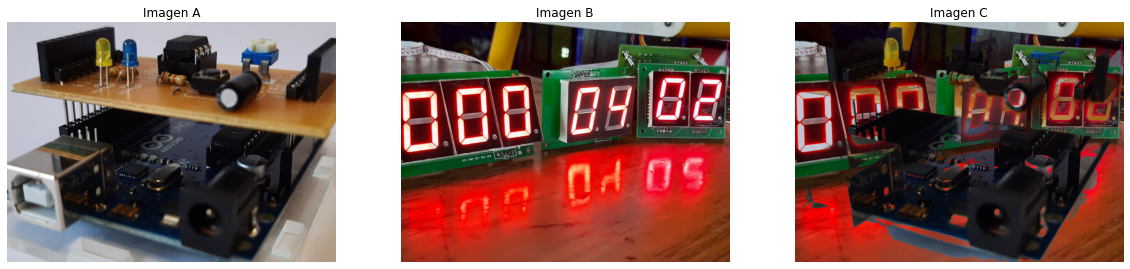

In [17]:
im_C = darker(im_A, im_B)

results['If-darker'] = im_C

plot_result()

## **4. Resultados de cada operación**

### **4.1. Cuasi-suma**

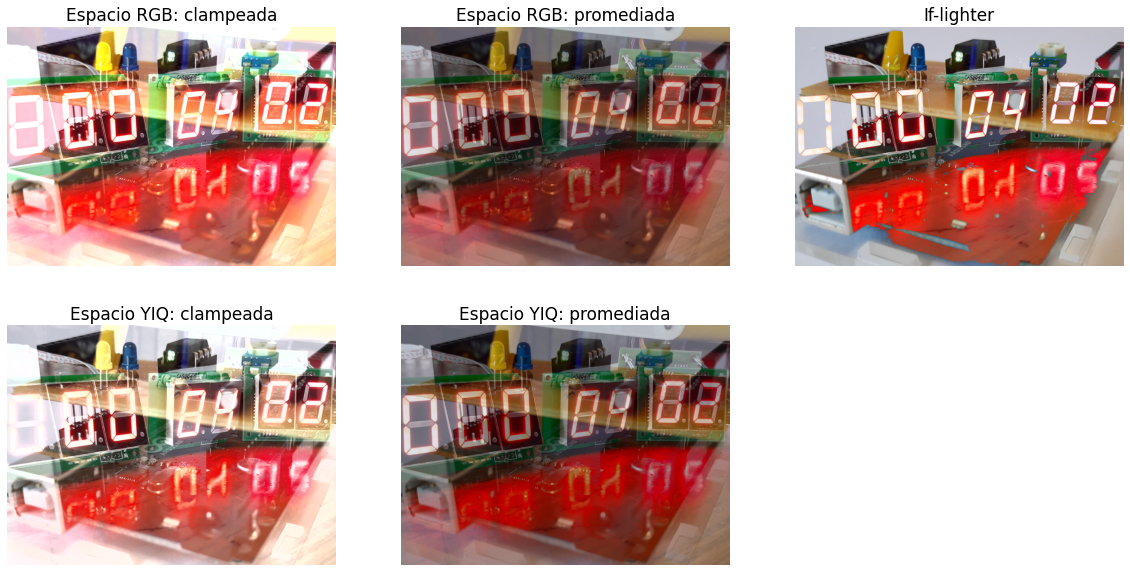

In [18]:
fig, axs = plt.subplots(2, 3, figsize=(20,20))

axs[0, 0].set_title('Espacio RGB: clampeada', size=17)
axs[0, 0].imshow(results['Suma clampeada RGB'])
axs[0, 0].set_axis_off()

axs[0, 1].set_title('Espacio RGB: promediada', size=17)
axs[0, 1].imshow(results['Suma promediada RGB'])
axs[0, 1].set_axis_off()

axs[0, 2].set_title('If-lighter', size=17)
axs[0, 2].imshow(results['If-lighter'])
axs[0, 2].set_axis_off()

axs[1, 0].set_title('Espacio YIQ: clampeada', size=17)
axs[1, 0].imshow(results['Suma clampeada YIQ'])
axs[1, 0].set_axis_off()

axs[1, 1].set_title('Espacio YIQ: promediada', size=17)
axs[1, 1].imshow(results['Suma promediada YIQ'])
axs[1, 1].set_axis_off()

axs[1, 2].set_visible(False)

plt.subplots_adjust(bottom=0.5)
plt.show()

### **4.2. Cuasi-resta**

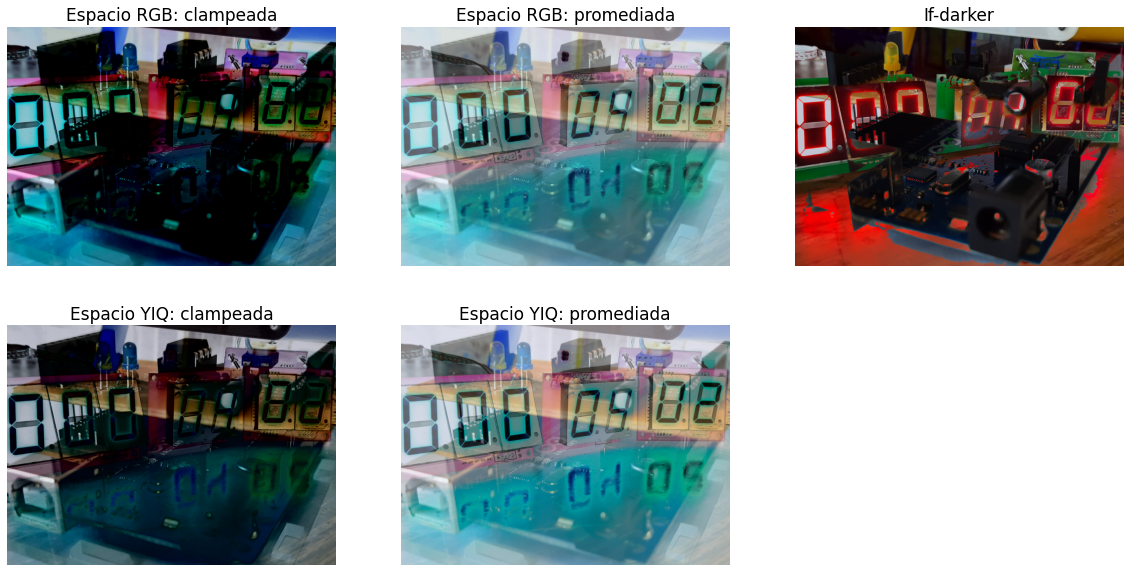

In [19]:
fig, axs = plt.subplots(2, 3, figsize=(20,20))

axs[0, 0].set_title('Espacio RGB: clampeada', size=17)
axs[0, 0].imshow(results['Resta clampeada RGB'])
axs[0, 0].set_axis_off()

axs[0, 1].set_title('Espacio RGB: promediada', size=17)
axs[0, 1].imshow(results['Resta promediada RGB'])
axs[0, 1].set_axis_off()

axs[0, 2].set_title('If-darker', size=17)
axs[0, 2].imshow(results['If-darker'])
axs[0, 2].set_axis_off()

axs[1, 0].set_title('Espacio YIQ: clampeada', size=17)
axs[1, 0].imshow(results['Resta clampeada YIQ'])
axs[1, 0].set_axis_off()

axs[1, 1].set_title('Espacio YIQ: promediada', size=17)
axs[1, 1].imshow(results['Resta promediada YIQ'])
axs[1, 1].set_axis_off()

axs[1, 2].set_visible(False)

plt.subplots_adjust(bottom=0.5)
plt.show()